In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from vega_datasets import data


In [2]:
df = pd.DataFrame(data.sf_temps())
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df['month'] = df.date.dt.month

In [5]:
df = df.set_index('date').sort_index()

In [6]:
df.sample(3)

,temp,month
date,,
2010-05-10 10:00:00,61.2,5
2010-10-01 19:00:00,61.3,10
2010-06-04 15:00:00,65.9,6


# Part 1
# Q1
### Resample by the day and take the average temperature. Visualize the average temperature over time.


In [7]:
by_day = df.asfreq('D')
by_day

,temp,month
date,,
2010-01-01,47.8,1
2010-01-02,47.9,1
2010-01-03,48.0,1
2010-01-04,48.1,1
2010-01-05,48.0,1
...,...,...
2010-12-27,47.6,12
2010-12-28,47.6,12
2010-12-29,47.6,12


In [8]:
df.resample('D').mean().head()

,temp,month
date,,
2010-01-01,49.170833,1.0
2010-01-02,49.304167,1.0
2010-01-03,49.391667,1.0
2010-01-04,49.445833,1.0
2010-01-05,49.491667,1.0


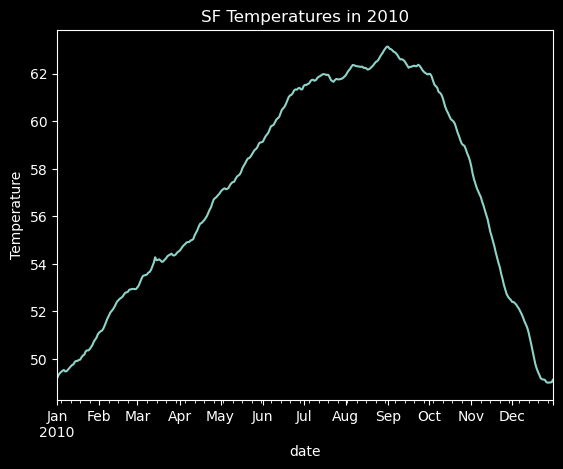

In [10]:
df.temp.resample('D').mean().plot()
plt.title('SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

# Q2
### Write the code necessary to visualize the minimum temperature over time.


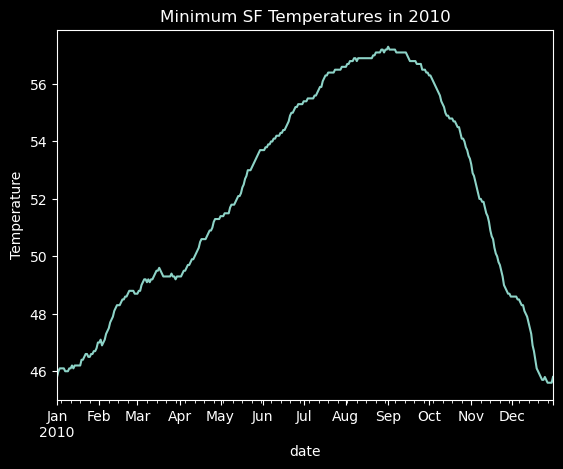

In [21]:
df.temp.resample('D').min().plot()
plt.title('Minimum SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

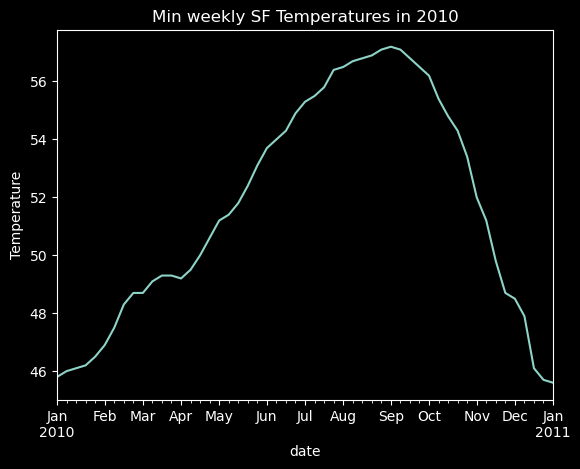

In [23]:
df.temp.resample('W').min().plot()
plt.title('Min weekly SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

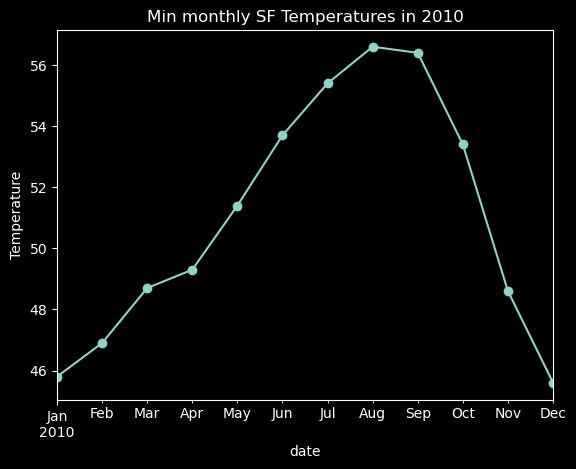

In [24]:
df.temp.resample('M').min().plot()
plt.title('Min monthly SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

# Q3
### Write the code necessary to visualize the maximum temperature over time.


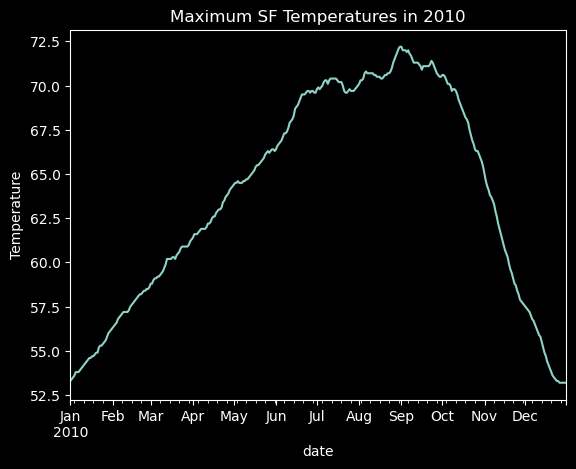

In [18]:
df.temp.resample('D').max().plot()
plt.title('Maximum SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

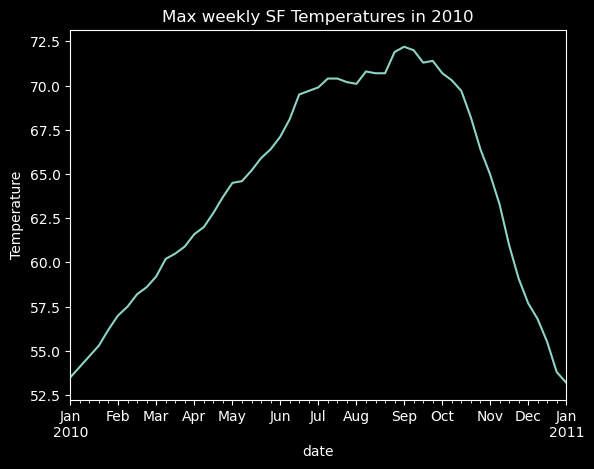

In [17]:
df.temp.resample('W').max().plot()
plt.title('Max weekly SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

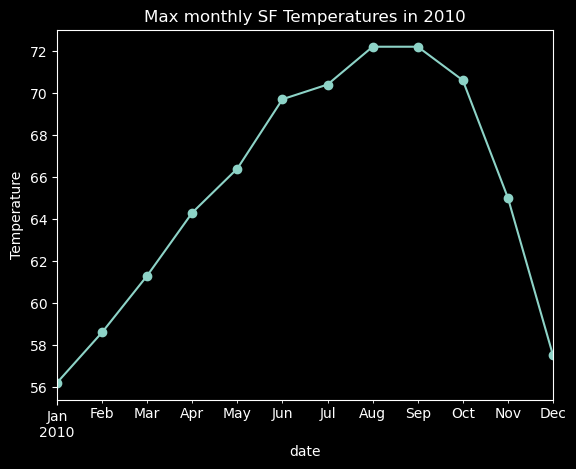

In [19]:
df.temp.resample('M').max().plot()
plt.title('Max monthly SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

# Q4
### Which month is the coldest, on average?


In [25]:
df.temp.resample('M').mean().sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

- answer: January (2010-01-31)


# Q5 
### Which month has the highest average temperature?


In [26]:
df.temp.resample('M').mean().sort_values(ascending=False)

date
2010-09-30    62.487083
2010-08-31    62.405376
2010-07-31    61.765457
2010-06-30    60.444722
2010-10-31    60.253091
2010-05-31    57.970968
2010-04-30    55.633056
2010-11-30    55.185139
2010-03-31    53.956528
2010-02-28    52.243899
2010-12-31    50.498253
2010-01-31    49.984140
Name: temp, dtype: float64

- answer: September (2010-09-30)


# Q6 
### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [27]:
daily_temps = df.temp.resample('D').agg(['min', 'max'])


In [28]:
daily_temps

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [29]:
daily_temps['temp_diff'] = daily_temps['max'] - daily_temps['min']


In [30]:
daily_temps

,min,max,temp_diff
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [31]:
daily_temps.temp_diff.resample('M').max().sort_values(ascending=False)


date
2010-08-31    15.0
2010-09-30    14.9
2010-06-30    14.8
2010-07-31    14.8
2010-10-31    14.4
2010-05-31    13.1
2010-04-30    13.0
2010-03-31    12.0
2010-11-30    11.8
2010-02-28     9.9
2010-01-31     9.3
2010-12-31     8.9
Name: temp_diff, dtype: float64

- answer: August (2010-08-31)


Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

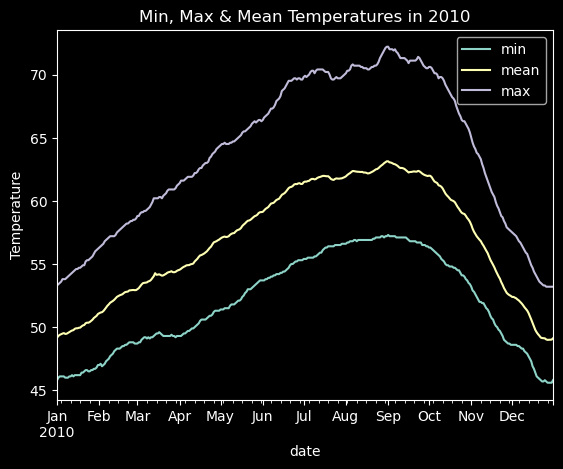

In [32]:
df.temp.resample('D').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Max & Mean Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

# Part 2 Seatle Weather Exercises:


In [33]:
seatle = data.seattle_weather()
seatle.head(3)


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain


In [34]:
seatle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [35]:
seatle = seatle.set_index('date').sort_index()


In [36]:
seatle.head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain


# Q1
### Which year and month combination has the highest amount of precipitation?


In [45]:
seatle.precipitation.resample('M').mean().sort_values(ascending=False)[:11]


date
2015-12-31    9.177419
2014-03-31    7.741935
2015-11-30    7.086667
2012-11-30    7.016667
2012-03-31    5.903226
2012-12-31    5.612903
2012-01-31    5.590323
2014-02-28    5.542857
2014-10-31    5.532258
2012-10-31    5.493548
2013-09-30    5.226667
Name: precipitation, dtype: float64

In [41]:
seatle.precipitation.max()


55.9

In [39]:
seatle.precipitation.sort_values(ascending=False)


date
2015-03-15    55.9
2015-12-08    54.1
2012-11-19    54.1
2015-11-14    47.2
2014-03-05    46.7
              ... 
2013-10-13     0.0
2013-10-14     0.0
2013-10-15     0.0
2013-10-16     0.0
2015-12-31     0.0
Name: precipitation, Length: 1461, dtype: float64

- Answer: March 2015


# Q2
### Visualize the amount of monthly precipitation over time.


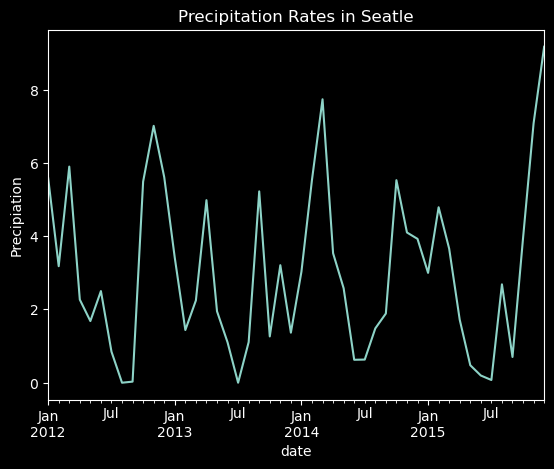

In [46]:
seatle.precipitation.resample('M').mean().plot()
plt.title('Precipitation Rates in Seatle')
plt.ylabel('Precipiation')
plt.show()

# Q3 
### Visualize the amount of wind over time. Choose a time interval you think is appropriate.


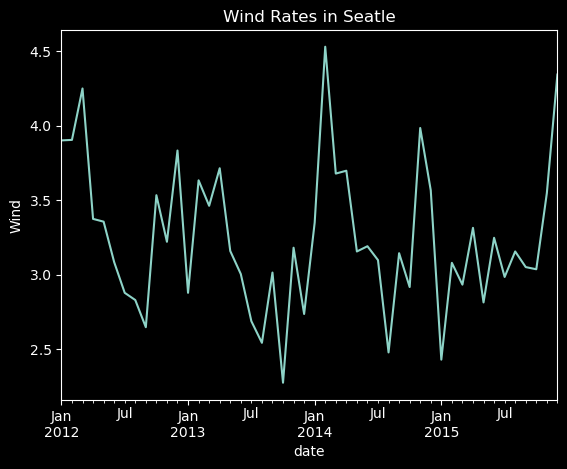

In [47]:
seatle.wind.resample('M').mean().plot()
plt.title('Wind Rates in Seatle')
plt.ylabel('Wind')
plt.show()

# Q4 
### Which year-month combination is the windiest?


In [48]:
seatle.wind.sort_values(ascending=False)


date
2012-12-17    9.5
2014-01-11    8.8
2013-12-01    8.8
2012-01-21    8.2
2014-01-12    8.1
             ... 
2013-01-22    0.6
2013-11-25    0.5
2015-01-10    0.5
2013-12-26    0.5
2013-10-23    0.4
Name: wind, Length: 1461, dtype: float64

- Answer: December 2012 (2012-12-17) with 9.50


# Q5 
### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [49]:
seatle.weather.unique()


array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [50]:
seatle.weather.value_counts()


weather
sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: count, dtype: int64

In [51]:
seatle['sunny_day'] = seatle.weather == 'sun'


In [52]:
seatle.head()


,precipitation,temp_max,temp_min,wind,weather,sunny_day
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [53]:
seatle.sunny_day.resample('Y').sum().sort_values(ascending=False)


date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: sunny_day, dtype: int64

In [54]:
seatle.sunny_day.resample('Y').mean().sort_values(ascending=False)


date
2014-12-31    0.578082
2013-12-31    0.561644
2015-12-31    0.493151
2012-12-31    0.322404
Name: sunny_day, dtype: float64

- Answer: 2014 (2014-12-31) with 211 days of sun


# Q6
### In which month does it rain the most?


In [55]:
seatle['rainy_day'] = seatle.weather == 'rain'


In [56]:
seatle.head()

,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True


In [57]:
seatle['month'] = seatle.index.month


In [58]:
seatle.head()


,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day,month
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,1
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,1
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True,1
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True,1
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True,1


In [61]:
seatle.rainy_day.resample('M').sum().sort_values(ascending=False)[:11]


date
2012-11-30    25
2012-12-31    23
2013-02-28    23
2012-03-31    19
2012-04-30    19
2012-06-30    19
2013-03-31    18
2012-01-31    18
2012-10-31    17
2012-02-29    17
2013-01-31    16
Name: rainy_day, dtype: int64

In [60]:
seatle.groupby('month').precipitation.sum().sort_values(ascending=False)


month
11    642.5
12    622.7
3     606.2
10    503.4
1     466.0
2     422.0
4     375.4
9     235.5
5     207.5
8     163.7
6     132.9
7      48.2
Name: precipitation, dtype: float64

- Answer: November (11) with 642.50 precipitation


# Q7 
### Which month has the most number of days with a non-zero amount of precipitation

In [62]:
seatle.groupby('month').rainy_day.mean().sort_values(ascending=False)


month
2     0.353982
3     0.298387
1     0.282258
11    0.208333
12    0.185484
4     0.166667
10    0.161290
6     0.158333
5     0.129032
7     0.112903
8     0.048387
9     0.033333
Name: rainy_day, dtype: float64

In [63]:
seatle['precip_amnt'] = seatle.precipitation > 0


In [64]:
seatle.head()


,precipitation,temp_max,temp_min,wind,weather,sunny_day,rainy_day,month,precip_amnt
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,False,1,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,True,1,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,True,1,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,True,1,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,True,1,True


In [65]:
seatle.groupby('month').precip_amnt.mean().sort_values(ascending=False)


month
12    0.653226
2     0.646018
11    0.591667
3     0.588710
1     0.532258
10    0.491935
4     0.491667
6     0.308333
9     0.291667
5     0.274194
8     0.177419
7     0.088710
Name: precip_amnt, dtype: float64

- Answer: if using 'rain' from weather- February has the most rain
- Answer: if using 'precipiation' column > 0, December has most rain

# Part 3 Flight Exercises:

In [66]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [67]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [68]:
flights = flights.set_index('date').sort_index()


In [69]:
flights.head(3)

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL


# Q1
### Convert any negative delays to 0.


In [70]:
flights['neg_delay'] = flights.delay < 0


In [71]:
flights['delay'] = flights['delay'].apply(lambda x : x if x > 0 else 0)


In [73]:
flights.sample(15)


,delay,distance,origin,destination,neg_delay
date,,,,,
2001-03-07 17:25:00,0,189,AUS,DAL,True
2001-01-19 16:35:00,0,718,MCI,ABQ,True
2001-01-21 15:38:00,0,239,DAL,HOU,False
2001-03-19 12:20:00,0,842,PVD,MDW,True
2001-03-29 19:31:00,19,493,ABQ,SLC,False
2001-02-14 20:40:00,0,321,BHM,MSY,True
2001-02-14 18:08:00,68,237,MCI,STL,False
2001-01-31 17:30:00,0,178,FLL,MCO,False
2001-01-24 11:45:00,0,371,SNA,OAK,False


In [74]:
flights.delay.min()


0

# Q2
### Which hour of the day has the highest average delay?


In [75]:
flights.resample('H').delay.mean()


date
2001-01-01 00:00:00    14.000000
2001-01-01 01:00:00          NaN
2001-01-01 02:00:00          NaN
2001-01-01 03:00:00          NaN
2001-01-01 04:00:00          NaN
                         ...    
2001-03-31 17:00:00    11.666667
2001-03-31 18:00:00    12.538462
2001-03-31 19:00:00    22.125000
2001-03-31 20:00:00    27.600000
2001-03-31 21:00:00    11.200000
Freq: H, Name: delay, Length: 2158, dtype: float64

In [76]:
flights['hour'] = flights.index.hour


In [77]:
flights.sample(10)


,delay,distance,origin,destination,neg_delay,hour
date,,,,,,
2001-03-21 12:35:00,0,323,BHM,SDF,True,12
2001-01-20 07:30:00,0,647,PHX,SMF,True,7
2001-03-16 09:05:00,3,405,MDW,MCI,False,9
2001-01-03 17:55:00,68,236,LAX,LAS,False,17
2001-03-31 13:00:00,0,647,SMF,PHX,True,13
2001-02-06 13:50:00,13,325,OAK,BUR,False,13
2001-01-15 09:00:00,0,337,LAX,OAK,True,9
2001-01-23 13:15:00,4,307,CLE,MDW,False,13
2001-02-18 07:50:00,0,108,PVD,ISP,True,7


In [78]:
flights.groupby('hour').delay.sum().sort_values(ascending=False)


hour
20    20126
21    19875
19    19833
17    18849
18    18375
16    17157
15    16041
14    14036
13    13492
22    12068
12    11951
11     9062
10     6752
9      5993
8      5421
7      4356
23     4248
6      2425
0      1535
3       605
1       170
5        19
Name: delay, dtype: int64

- Answer: 8pm (20) with 20126 minutes of delay


# Q3
### Does the day of the week make a difference in the delay amount?


In [79]:
flights.resample('D').delay.mean()


date
2001-01-01     8.747126
2001-01-02    21.808411
2001-01-03    17.150000
2001-01-04     7.176724
2001-01-05     9.294118
                ...    
2001-03-27     4.669683
2001-03-28     3.551282
2001-03-29    13.545455
2001-03-30     8.893162
2001-03-31     7.000000
Freq: D, Name: delay, Length: 90, dtype: float64

In [80]:
flights['day'] = flights.index.day_name()


In [81]:
flights.sample(10)

,delay,distance,origin,destination,neg_delay,hour,day
date,,,,,,,
2001-03-22 11:10:00,0,223,ABQ,ELP,True,11,Thursday
2001-01-13 10:10:00,0,422,SLC,RNO,True,10,Saturday
2001-03-29 22:38:00,39,254,SDF,STL,False,22,Thursday
2001-02-21 18:30:00,0,293,DAL,LBB,True,18,Wednesday
2001-02-26 13:25:00,0,440,STL,DTW,True,13,Monday
2001-03-30 17:30:00,5,697,SEA,SJC,False,17,Friday
2001-02-28 09:45:00,14,471,BNA,MSY,False,9,Wednesday
2001-03-09 19:50:00,5,1363,MCI,LAX,False,19,Friday
2001-01-28 16:00:00,0,1262,STL,PHX,True,16,Sunday


In [82]:
weekday_delay = flights.groupby('day').delay.mean().sort_values(ascending=False)
weekday_delay

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

In [83]:
flights.day.value_counts()

day
Wednesday    3079
Friday       3028
Thursday     3011
Monday       2980
Tuesday      2945
Sunday       2614
Saturday     2343
Name: count, dtype: int64

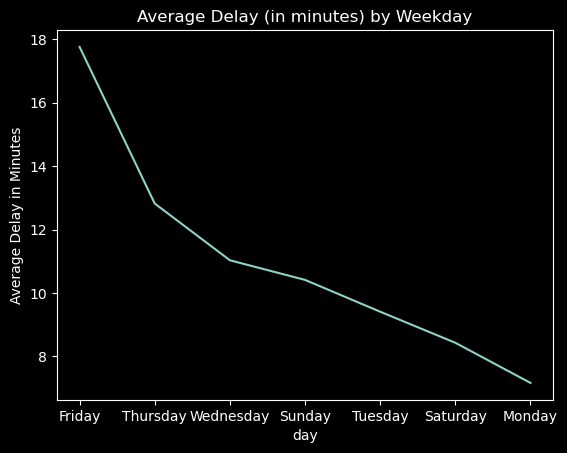

In [84]:
weekday_delay.plot()
plt.title('Average Delay (in minutes) by Weekday')
plt.ylabel('Average Delay in Minutes')
plt.show()

- Answer: Yes. The weekday does matter
- Friday has the longest delay. Monday has the shortest delay.
- BUT Wednesday has the most delays and Saturday has the least delays

# Q4
### Does the month make a difference in the delay amount?


In [85]:
flights['month'] = flights.index.month_name()


In [86]:
flights.sample(10)

,delay,distance,origin,destination,neg_delay,hour,day,month
date,,,,,,,,
2001-01-19 09:30:00,5,370,PHX,LAX,False,9,Friday,January
2001-01-11 13:47:00,21,197,FLL,TPA,False,13,Thursday,January
2001-02-11 15:05:00,0,605,SEA,SMF,True,15,Sunday,February
2001-02-26 17:00:00,32,397,LAS,SMF,False,17,Monday,February
2001-02-28 12:45:00,35,180,OAK,RNO,False,12,Wednesday,February
2001-03-26 07:55:00,0,192,HOU,SAT,True,7,Monday,March
2001-02-25 22:04:00,61,303,HOU,MSY,False,22,Sunday,February
2001-01-24 16:40:00,53,1912,PHX,BUF,False,16,Wednesday,January
2001-02-18 18:35:00,5,689,SEA,SLC,False,18,Sunday,February


In [87]:
monthly_delay = flights.groupby('month').delay.mean()
monthly_delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

In [88]:
flights.month.value_counts()


month
March       6960
January     6784
February    6256
Name: count, dtype: int64

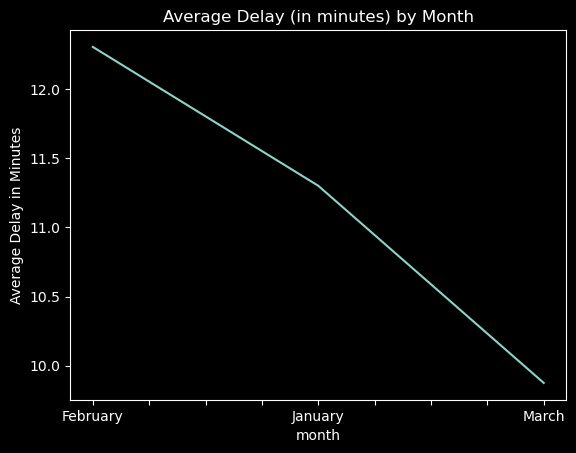

In [89]:
monthly_delay.plot()
plt.title('Average Delay (in minutes) by Month')
plt.ylabel('Average Delay in Minutes')
plt.show()